In [87]:
import pandas as pd
import re
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
def read_advanced_season_stats(filepath):
    '''
    Function reads in the file at 'filepath' and returns a dataframe of the advanced stats
    Inputs: filepath--a path to the file (*advanced.csv)
    Returns: dataframe of per season advanced stats
    '''
    df = pd.read_csv(filepath)
    #pull the seasonal years from the filepath
    years = re.findall(r"\d\d\d\d",filepath)
    #remove the "blank" columns that were added via the data mining recipe
    df.drop(['Blank', 'Blank.1'], axis=1, inplace=True)
    #Get the ending year for the season
    df['Season'] = int(years[-1])
    
    return df #.sort_values(['Season', 'Player'], ascending=[True, True])

In [58]:
def read_pergame_season_stats(filepath):
    '''
    Function reads in the file at 'filepath' and returns a dataframe of the per_game stats
    Inputs: filepath--a path to the file (*advanced.csv)
    Returns: dataframe of per season advanced stats
    '''
    df = pd.read_csv(filepath)
    #pull the seasonal years from the filepath
    years = re.findall(r"\d\d\d\d",filepath)
    df['Season'] = int(years[-1])
    
    return df #.sort_values(['Season', 'Player'], ascending=[True, True])

In [24]:
df0607 = read_advanced_season_stats('../data/advanced/2006-2007_player_advanced.csv')

In [38]:
df0506pg = read_pergame_season_stats('../data/per_game/2005-2006_Player_per_game.csv')

In [43]:
df0506pg.head().T

,0,1,2,3,4
Rk,1,2,3,4,5
Player,Shareef Abdur-Rahim,Alex Acker,Malik Allen,Ray Allen*,Tony Allen
Pos,PF,SG,PF,SG,PG
Age,29,23,27,30,24
Tm,SAC,DET,CHI,SEA,BOS
G,72,5,54,78,51
GS,30,0,20,78,9
MP,27.2,7,13,38.7,19.2
FG,4.6,0.8,2.2,8.7,2.5
FGA,8.8,3.2,4.6,19.2,5.4


In [45]:
df0506pg[df0506pg.isnull().any(axis=1)].T

,1,6,12,26,27,38,42,46,47,48,...,512,517,521,523,534,537,542,543,544,562
Rk,2,7,11,19,20,25,29,33,33,33,...,418,423,427,429,438,439,442,442,442,458
Player,Alex Acker,Chris Andersen,Martynas Andriuskevicius,Stacey Augmon,Vin Baker,Earl Barron,Brandon Bass,Lonny Baxter,Lonny Baxter,Lonny Baxter,...,Jackson Vroman,Samaki Walker,Matt Walsh,Hakim Warrick,Robert Whaley,Chris Wilcox,Aaron Williams,Aaron Williams,Aaron Williams,Derrick Zimmerman
Pos,SG,C,C,SF,C,C,PF,C-PF,C,PF,...,PF,PF,SG,PF,C,PF,C,C,C,PG
Age,23,27,19,37,34,24,20,27,27,27,...,24,29,23,23,23,23,34,34,34,24
Tm,DET,NOK,CLE,ORL,LAC,MIA,NOK,TOT,HOU,CHA,...,NOK,IND,MIA,MEM,UTA,SEA,TOT,TOR,NOK,NJN
G,5,32,6,36,8,8,29,41,23,18,...,41,7,2,68,23,29,48,14,34,2
GS,0,2,0,3,1,0,1,0,0,0,...,2,0,0,2,0,23,5,3,2,0
MP,7,17.8,1.5,10.7,10.6,5.6,9.2,9.8,12.2,6.6,...,9.9,3.1,1.5,10.6,9.2,30.1,16.5,7.1,20.4,16
FG,0.8,1.8,0,0.7,0.9,0.6,1,1.1,1.4,0.7,...,0.6,0,0.5,1.5,1,5.8,1.9,0.7,2.4,1
FGA,3.2,3.1,0.2,2,1.9,2,2.4,2.5,3.1,1.8,...,1.6,0.3,0.5,3.4,2.5,9.7,3.7,1.4,4.6,1.5


Some of the rows have NANs in them, probably from players who do not have many minutes across the season.  Or they just never shot a 3, or they never took a freethrow, or something to that effect.

In [25]:
df0607.info()
df0607[df0607.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 28 columns):
Rk        516 non-null int64
Player    516 non-null object
Pos       516 non-null object
Age       516 non-null int64
Tm        516 non-null object
G         516 non-null int64
MP        516 non-null int64
PER       516 non-null float64
TS%       513 non-null float64
3PAr      513 non-null float64
FTr       513 non-null float64
ORB%      516 non-null float64
DRB%      516 non-null float64
TRB%      516 non-null float64
AST%      516 non-null float64
STL%      516 non-null float64
BLK%      516 non-null float64
TOV%      513 non-null float64
USG%      516 non-null float64
OWS       516 non-null float64
DWS       516 non-null float64
WS        516 non-null float64
WSp48     516 non-null float64
OBPM      516 non-null float64
DBPM      516 non-null float64
BPM       516 non-null float64
VORP      516 non-null float64
Season    516 non-null int64
dtypes: float64(20), int64(5), object(3)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season
9,9,Lou Amundson,PF,24,UTA,1,2,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,-0.004,-5.3,0.2,-5.1,0.0,2007
94,88,Will Conroy,SG,24,MEM,3,17,4.2,NaN,NaN,...,0.0,0.0,0.0,0.0,0.035,-2.9,-0.1,-3.1,0.0,2007
398,351,Jeremy Richardson,SF,22,POR,1,1,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,-0.021,-5.7,-0.2,-5.8,0.0,2007


In [14]:
df0607[df0607.isnull().any(axis=1)].T

,9,94,398
Rk,9,88,351
Player,Lou Amundson,Will Conroy,Jeremy Richardson
Pos,PF,SG,SF
Age,24,24,22
Tm,UTA,MEM,POR
G,1,3,1
MP,2,17,1
PER,0,4.2,0
TS%,NaN,NaN,NaN
3PAr,NaN,NaN,NaN


In [28]:
listdir('../data/advanced')

['1998-1999_player_advanced.csv',
 '2006-2007_player_advanced.csv',
 '2007-2008_player_advanced.csv',
 '2015-2016_player_advanced.csv',
 '2011-2012_player_advanced.csv',
 '2003-2003_player_advanced.csv',
 '2010-2011_player_advanced.csv',
 '1999-2000_player_advanced.csv',
 '2014-2015_player_advanced.csv',
 '2003-2004_player_advanced.csv',
 '2012-2013_player_advanced.csv',
 '2001-2002_player_advanced.csv',
 '2017-2018_player_advanced.csv',
 '1997-1998_player_advanced.csv',
 '2016-2017_player_advanced.csv',
 '2008-2009_player_advanced.csv',
 '2005-2006_player_advanced.csv',
 '2004-2005_player_advanced.csv',
 '2009-2010_player_advanced.csv',
 '2013-2014_player_advanced.csv',
 '2000-2001_player_advanced.csv']

In [36]:
def read_all_advanced(pathtodir):
    '''
    Read every advanced stat file into separate dataframes
    Concats the per_season dataframes together, and returns a big dataframe 
    
    Input: pathtodir -- the path to the directory that contains the per_season advanced stat csv files
    NOTE: the directory should only have advanced stat files within.  Do not mix file types.
    Returns: dataframe of all advanced stats, uncleaned
    '''
    #get the individual files
    files = listdir(pathtodir)
    #get a list of dataframes, one for every file
    dataframes = [read_advanced_season_stats(pathtodir + '/' + file) for file in files]
    #assemble the dataframes together, and return them.
    return pd.concat(dataframes).sort_values(['Season', 'Player'], ascending=[True, True])

In [64]:
def read_all_pergame(pathtodir):
    '''
    Read every per_game stat file (one for each season) into separate dataframes
    Concats the per_game dataframes together, and returns a dataframe that contain the per_game_stats for every
    season in the directory
    
    Input: pathtodir -- the path to the directory that contains the per_season per_game stat csv files
    NOTE: the directory should only have per_game stat files within.  Do not mix file types within the directory.
    Returns: dataframe of all per_game stats, uncleaned
    '''
    #get the individual files
    files = listdir(pathtodir)
    #print(files)
    #get a list of dataframes, one for every file
    #Had some bad data, so had to troubleshoot, seems to be working now after fixing some of the csvs
    #for file in files:
    #    print('Reading',file)
    #    df = read_pergame_season_stats(pathtodir + '/' + file)
    dataframes = [read_pergame_season_stats(pathtodir + '/' + file) for file in files]
    #assemble the dataframes together, and return them.
    return pd.concat(dataframes).sort_values(['Season', 'Player'], ascending=[True, True])

In [59]:
advanced = read_all_advanced('../data/advanced')

In [60]:
advanced.groupby("Season").mean()

,Rk,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,TOV%,USG%,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP
Season,,,,,,,,,,,,,,,,,,,,,
1998,226.605119,27.471664,49.091408,1164.248629,12.505667,0.496919,0.157774,0.339910,6.517550,13.295978,...,15.637064,19.206399,1.231079,1.168556,2.400548,0.065322,-1.805484,-0.637112,-2.442413,0.538940
1999,215.287968,27.481262,31.406312,731.723866,12.024063,0.478750,0.155952,0.354135,6.562130,13.199408,...,15.595238,19.544379,0.812032,0.741223,1.556805,0.055609,-2.066272,-0.957396,-3.023866,0.362327
2000,216.266129,27.620968,51.340726,1200.512097,12.353831,0.494147,0.155715,0.310613,6.159274,13.896573,...,14.716566,18.678427,1.283065,1.221774,2.507258,0.067054,-1.805645,-0.564113,-2.368750,0.582460
2001,221.061453,27.864060,49.126629,1161.080074,11.996834,0.485656,0.149810,0.303987,6.026071,13.990503,...,15.613109,18.441341,1.245251,1.177095,2.423091,0.060337,-2.079516,-0.529236,-2.609125,0.548417
2002,219.704000,27.240000,50.964000,1221.540000,12.677000,0.492022,0.164268,0.304308,5.974000,13.827600,...,14.048893,18.778800,1.341800,1.222200,2.565400,0.070872,-1.688800,-0.517400,-2.207800,0.601400
2003,212.923395,27.140787,52.440994,1259.111801,12.212836,0.480056,0.156915,0.299722,6.159627,13.750518,...,14.766390,18.751760,1.380538,1.264803,2.640787,0.062516,-1.961905,-0.484886,-2.444720,0.614286
2004,225.576068,27.242735,46.953846,1116.661538,11.980684,0.483508,0.158675,0.307187,5.858120,13.918803,...,15.419316,18.683419,1.208205,1.122222,2.332137,0.061056,-2.141709,-0.627692,-2.770940,0.517265
2005,233.553846,27.206838,47.998291,1131.010256,12.378291,0.497630,0.181257,0.316180,6.077949,13.777436,...,14.582192,18.517094,1.195214,1.141538,2.337778,0.069586,-1.765812,-0.471966,-2.237607,0.538120
2006,228.639432,26.657194,48.539964,1147.493783,12.004635,0.504821,0.181578,0.345953,5.827094,14.363993,...,14.854562,18.556863,1.225933,1.152043,2.382060,0.062248,-2.067673,-0.533215,-2.600355,0.538721


Going to have to do something about these NANs

In [61]:
advanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11922 entries, 177 to 218
Data columns (total 28 columns):
Rk        11922 non-null int64
Player    11922 non-null object
Pos       11922 non-null object
Age       11922 non-null int64
Tm        11922 non-null object
G         11922 non-null int64
MP        11922 non-null int64
PER       11917 non-null float64
TS%       11862 non-null float64
3PAr      11858 non-null float64
FTr       11858 non-null float64
ORB%      11917 non-null float64
DRB%      11917 non-null float64
TRB%      11917 non-null float64
AST%      11917 non-null float64
STL%      11917 non-null float64
BLK%      11917 non-null float64
TOV%      11873 non-null float64
USG%      11917 non-null float64
OWS       11922 non-null float64
DWS       11922 non-null float64
WS        11922 non-null float64
WSp48     11917 non-null float64
OBPM      11922 non-null float64
DBPM      11922 non-null float64
BPM       11922 non-null float64
VORP      11922 non-null float64
Season    1

In [65]:
pergame = read_all_pergame('../data/per_game')

In [66]:
pergame

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,Season
195,148,A.C. Green,PF,33,TOT,83,73,30.0,2.8,5.8,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
196,148,A.C. Green,PF,33,PHO,27,19,20.3,2.3,4.7,...,1.2,3.9,5.1,0.6,0.7,0.0,0.7,1.3,5.7,1997
197,148,A.C. Green,PF,33,DAL,56,54,34.7,3.1,6.4,...,3.4,5.9,9.3,0.9,0.9,0.3,1.0,2.0,7.9,1997
333,252,Aaron McKie,SG,24,TOT,83,11,19.6,1.8,4.4,...,0.5,2.2,2.7,1.9,0.9,0.3,1.1,1.6,5.2,1997
334,252,Aaron McKie,SG,24,POR,41,8,18.9,1.3,3.8,...,0.3,2.0,2.3,2.0,0.8,0.4,1.2,1.5,4.1,1997
335,252,Aaron McKie,SG,24,DET,42,3,20.2,2.3,5.0,...,0.6,2.4,3.0,1.8,1.0,0.2,1.0,1.6,6.3,1997
546,420,Aaron Williams,PF-C,25,TOT,33,1,17.1,2.6,4.5,...,1.9,2.5,4.3,0.5,0.5,0.9,1.0,2.2,6.2,1997
547,420,Aaron Williams,C,25,DEN,1,0,10.0,3.0,5.0,...,2.0,3.0,5.0,0.0,0.0,3.0,4.0,0.0,6.0,1997
548,420,Aaron Williams,PF,25,VAN,32,1,17.3,2.6,4.5,...,1.9,2.4,4.3,0.5,0.5,0.8,0.9,2.3,6.2,1997
142,109,Acie Earl,C,26,TOT,47,0,10.6,1.4,3.8,...,0.7,1.3,2.0,0.4,0.3,0.6,0.7,1.3,4.0,1997


Number of  players in per game dataframe

In [69]:
len(pergame['Player'].unique())

2011

Number of players in advanced dataframe

In [70]:
len(advanced['Player'].unique())

1940

In [75]:
sorted(advanced['Pos'].unique())

['C',
 'C-PF',
 'C-SF',
 'PF',
 'PF-C',
 'PF-SF',
 'PG',
 'PG-SF',
 'PG-SG',
 'SF',
 'SF-PF',
 'SF-SG',
 'SG',
 'SG-PF',
 'SG-PG',
 'SG-SF']

In [76]:
sorted(pergame['Pos'].unique())

['C',
 'C-PF',
 'C-SF',
 'PF',
 'PF-C',
 'PF-SF',
 'PG',
 'PG-SF',
 'PG-SG',
 'SF',
 'SF-PF',
 'SF-SG',
 'SG',
 'SG-PF',
 'SG-PG',
 'SG-SF']

At least the positions are consistent between the pergame and position tables.

Who is in the pergame table who is not in the advanced table?

In [79]:
set(pergame['Player'].unique()) - set(advanced['Player'].unique())

{'Acie Earl',
 'Aleksandar Djordjevic',
 'Ashraf Amaya',
 'Brent Scott',
 'Brett Szabo',
 'Byron Scott',
 'Chris Jent',
 'Craig Ehlo',
 'Cuonzo Martin',
 'Darrin Hancock',
 'David Wood',
 'Dell Demps',
 'Derrick Alston',
 'Dexter Boney',
 'Dino Radja*',
 'Donnie Boyce',
 'Earl Cureton',
 "Ed O'Bannon",
 'Ed Pinckney',
 'Elmer Bennett',
 'Elmore Spencer',
 'Ennis Whatley',
 'Eric Leckner',
 'Eric Mobley',
 'Evric Gray',
 'Frank Brickowski',
 'Frankie King',
 'Fred Roberts',
 'Gaylon Nickerson',
 'Greg Dreiling',
 'James Scott',
 'Jerome Allen',
 'Jimmy Carruth',
 'Jimmy King',
 'Joe Courtney',
 'John Long',
 'Keith Tower',
 'Ken Norman',
 'Kenny Smith',
 'Kevin Duckworth',
 'Kevin Gamble',
 'LaSalle Thompson',
 'Larry Krystkowiak',
 'Larry Stewart',
 'Lionel Simmons',
 'Lou Roe',
 'Mark Bradtke',
 'Martin Lewis',
 'Matt Fish',
 'Matt Steigenga',
 'Melvin Booker',
 'Mike Brown',
 'Nate Driggers',
 'Rafael Addison',
 'Randolph Childress',
 'Ray Owes',
 'Rich Manning',
 'Robert Parish*',
 

Ok, these look like older players who may not have much of the advanced stats

In [81]:
notinadvanced = set(pergame['Player'].unique()) - set(advanced['Player'].unique())

In [83]:
for player in notinadvanced:
    print(pergame[pergame['Player']== player])

      Rk      Player Pos  Age   Tm  G  GS    MP   FG  FGA   ...    ORB  DRB  \
270  202  Jimmy King  SG   23  DEN  2   0  11.0  1.0  3.0   ...    1.0  0.0   

     TRB  AST  STL  BLK  TOV   PF  PS/G  Season  
270  1.0  1.0  1.5  0.0  0.5  1.0   3.0    1997  

[1 rows x 31 columns]
      Rk          Player Pos  Age   Tm   G  GS   MP   FG  FGA   ...    ORB  \
206  155  Darrin Hancock  SF   25  TOT  24   0  5.5  0.7  1.5   ...    0.2   
207  155  Darrin Hancock  SF   25  MIL   9   0  4.3  0.2  0.7   ...    0.1   
208  155  Darrin Hancock  SF   25  ATL  14   0  6.1  0.9  1.9   ...    0.2   
209  155  Darrin Hancock  SF   25  SAS   1   0  8.0  1.0  2.0   ...    0.0   

     DRB  TRB  AST  STL  BLK  TOV   PF  PS/G  Season  
206  0.6  0.8  0.5  0.4  0.0  0.5  0.6   1.8    1997  
207  0.4  0.6  0.4  0.2  0.0  0.4  0.8   0.4    1997  
208  0.7  0.9  0.5  0.5  0.1  0.5  0.4   2.4    1997  
209  0.0  0.0  1.0  0.0  0.0  0.0  2.0   4.0    1997  

[4 rows x 31 columns]
      Rk       Player Pos  Ag

[3 rows x 31 columns]
      Rk       Player Pos  Age   Tm   G  GS    MP   FG  FGA   ...    ORB  DRB  \
349  262  Eric Mobley   C   26  VAN  28   8  11.0  1.0  2.3   ...    1.1  1.0   

     TRB  AST  STL  BLK  TOV   PF  PS/G  Season  
349  2.1  0.5  0.2  0.4  1.0  1.6   2.6    1997  

[1 rows x 31 columns]
      Rk      Player Pos  Age   Tm  G  GS   MP   FG  FGA   ...    ORB  DRB  \
246  184  Chris Jent  SF   27  NYK  3   0  3.3  0.7  2.0   ...    0.3  0.0   

     TRB  AST  STL  BLK  TOV   PF  PS/G  Season  
246  0.3  0.3  0.0  0.0  0.0  0.7   2.0    1997  

[1 rows x 31 columns]
   Rk          Player Pos  Age   Tm  G  GS   MP   FG  FGA   ...    ORB  DRB  \
8   7  Derrick Alston   C   24  ATL  2   0  5.5  0.0  2.5   ...    1.5  0.5   

   TRB  AST  STL  BLK  TOV   PF  PS/G  Season  
8  2.0  0.0  0.0  0.0  0.0  0.0   0.0    1997  

[1 rows x 31 columns]
      Rk         Player Pos  Age   Tm   G  GS   MP   FG  FGA   ...    ORB  \
133  102  Greg Dreiling   C   34  DAL  40   3  9.7  0.9  

[1 rows x 31 columns]
      Rk       Player Pos  Age   Tm   G  GS   MP   FG  FGA   ...    ORB  DRB  \
353  264  Tracy Moore  SG   31  HOU  27   1  8.8  1.2  3.1   ...    0.4  0.6   

     TRB  AST  STL  BLK  TOV   PF  PS/G  Season  
353  1.0  0.7  0.2  0.0  0.5  0.7   3.7    1997  

[1 rows x 31 columns]
    Rk         Player Pos  Age   Tm  G  GS   MP   FG  FGA   ...    ORB  DRB  \
79  61  Jimmy Carruth  PF   27  MIL  4   0  5.3  0.5  0.8   ...    0.0  1.0   

    TRB  AST  STL  BLK  TOV   PF  PS/G  Season  
79  1.0  0.0  0.0  0.5  0.3  1.0   1.3    1997  

[1 rows x 31 columns]
      Rk                 Player Pos  Age   Tm   G  GS    MP   FG  FGA   ...    \
311  234  Sarunas Marciulionis*  SG   32  DEN  17   0  15.0  2.2  5.9   ...     

     ORB  DRB  TRB  AST  STL  BLK  TOV   PF  PS/G  Season  
311  0.7  1.1  1.8  1.5  0.7  0.1  2.4  2.2   6.8    1997  

[1 rows x 31 columns]
      Rk      Player Pos  Age   Tm  G  GS   MP   FG  FGA   ...    ORB  DRB  \
193  146  Evric Gray  SF   27 

In [84]:
advanced.groupby('Season').mean()

,Rk,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,TOV%,USG%,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP
Season,,,,,,,,,,,,,,,,,,,,,
1998,226.605119,27.471664,49.091408,1164.248629,12.505667,0.496919,0.157774,0.339910,6.517550,13.295978,...,15.637064,19.206399,1.231079,1.168556,2.400548,0.065322,-1.805484,-0.637112,-2.442413,0.538940
1999,215.287968,27.481262,31.406312,731.723866,12.024063,0.478750,0.155952,0.354135,6.562130,13.199408,...,15.595238,19.544379,0.812032,0.741223,1.556805,0.055609,-2.066272,-0.957396,-3.023866,0.362327
2000,216.266129,27.620968,51.340726,1200.512097,12.353831,0.494147,0.155715,0.310613,6.159274,13.896573,...,14.716566,18.678427,1.283065,1.221774,2.507258,0.067054,-1.805645,-0.564113,-2.368750,0.582460
2001,221.061453,27.864060,49.126629,1161.080074,11.996834,0.485656,0.149810,0.303987,6.026071,13.990503,...,15.613109,18.441341,1.245251,1.177095,2.423091,0.060337,-2.079516,-0.529236,-2.609125,0.548417
2002,219.704000,27.240000,50.964000,1221.540000,12.677000,0.492022,0.164268,0.304308,5.974000,13.827600,...,14.048893,18.778800,1.341800,1.222200,2.565400,0.070872,-1.688800,-0.517400,-2.207800,0.601400
2003,212.923395,27.140787,52.440994,1259.111801,12.212836,0.480056,0.156915,0.299722,6.159627,13.750518,...,14.766390,18.751760,1.380538,1.264803,2.640787,0.062516,-1.961905,-0.484886,-2.444720,0.614286
2004,225.576068,27.242735,46.953846,1116.661538,11.980684,0.483508,0.158675,0.307187,5.858120,13.918803,...,15.419316,18.683419,1.208205,1.122222,2.332137,0.061056,-2.141709,-0.627692,-2.770940,0.517265
2005,233.553846,27.206838,47.998291,1131.010256,12.378291,0.497630,0.181257,0.316180,6.077949,13.777436,...,14.582192,18.517094,1.195214,1.141538,2.337778,0.069586,-1.765812,-0.471966,-2.237607,0.538120
2006,228.639432,26.657194,48.539964,1147.493783,12.004635,0.504821,0.181578,0.345953,5.827094,14.363993,...,14.854562,18.556863,1.225933,1.152043,2.382060,0.062248,-2.067673,-0.533215,-2.600355,0.538721


In [94]:
wsstd = advanced.groupby('Season').std()['WS']

In [95]:
wsmean = advanced.groupby('Season').mean()['WS']


In [104]:
seasons = list(advanced.groupby('Season').groups.keys())

In [100]:
advanced.groupby('Season').count()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP
Season,,,,,,,,,,,,,,,,,,,,,
1998,547,547,547,547,547,547,547,547,544,544,...,545,547,547,547,547,547,547,547,547,547
1999,507,507,507,507,507,507,507,507,504,503,...,504,507,507,507,507,507,507,507,507,507
2000,496,496,496,496,496,496,496,496,495,494,...,495,496,496,496,496,496,496,496,496,496
2001,537,537,537,537,537,537,537,537,532,532,...,534,537,537,537,537,537,537,537,537,537
2002,500,500,500,500,500,500,500,500,497,497,...,497,500,500,500,500,500,500,500,500,500
2003,483,483,483,483,483,483,483,483,482,482,...,482,483,483,483,483,483,483,483,483,483
2004,585,585,585,585,585,585,585,585,583,582,...,585,585,585,585,585,585,585,585,585,585
2005,585,585,585,585,585,585,585,585,584,583,...,584,585,585,585,585,585,585,585,585,585
2006,563,563,563,563,563,563,563,561,559,559,...,559,561,563,563,563,561,563,563,563,563


In [91]:
for i, m in advanced.groupby("Season"):
    ax.plot(m.Time, m.Mean)
    ax.fill_between(m.Time, m.Mean - m.Std, m.Mean + m.Std, alpha=0.35)

AttributeError: 'DataFrame' object has no attribute 'Time'

Text(0.5, 1.0, 'Win-Shares with Standard Deviation Per Season')

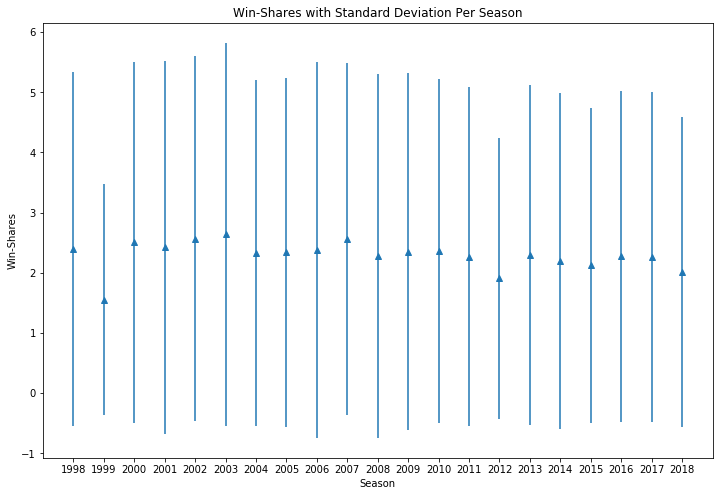

In [113]:
plt.figure(figsize=(12,8))
plt.errorbar(seasons, wsmean, wsstd, linestyle='None', marker='^')
plt.xlabel('Season')
plt.ylabel('Win-Shares')
plt.xticks(seasons, seasons)
plt.title('Win-Shares with Standard Deviation Per Season')


Text(0.5, 0, 'Win Shares')

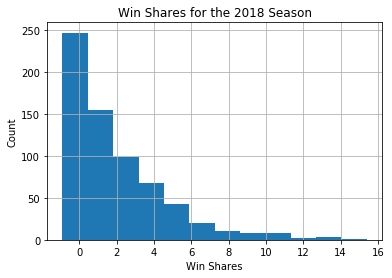

In [118]:
advanced[advanced['Season'] == 2018]['WS'].hist(bins=12)
plt.title('Win Shares for the 2018 Season')
plt.ylabel('Count')
plt.xlabel('Win Shares')

In [124]:
def plot_histogram(df, colname, season, bins=10, xlabel = None):
    '''
    Plots a histogram of the dataframe, based on the column name and the season
    df: input dataframe (pandas dataframe)
    colname: e.g., 'WS' for Win shares (string)
    season: e.g, 2018 (integer)
    
    Returns: Nothing
    '''
    df[df['Season'] == season][colname].hist(bins=bins)
    plt.title('Win Shares for the ' + str(season) + ' Season')
    plt.ylabel('Count')
    plt.xlabel(xlabel)

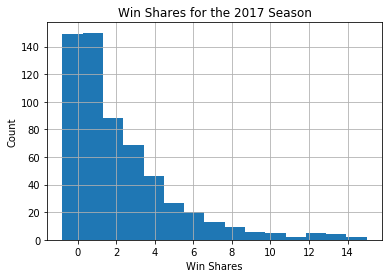

In [125]:
plot_histogram(advanced, 'WS', 2017, bins=15, xlabel = "Win Shares")